## Processing neural datasets
Process neural datasets into python structures for smaller storage size and faster access

In [1]:
%load_ext autoreload
%autoreload 2


import neural_datasets

from pprint import pprint

import os
if not os.path.exists('../data'):
    os.makedirs('../data')
if not os.path.exists('../data/datasets'):
    os.makedirs('../data/datasets')


datadir = '/scratches/ramanujan_2/dl543/'
datadir2 = '/scratches/sagarmatha_2/ktj21/data/crcns/'

We load the dataset for one session from the original files downloaded from [CRCNR.org](https://crcns.org/), which is then preprocessed and put into a pickle file in the ```../data/datasets``` directory.

In [2]:
# Mice sleep/wake exploration, head direction cells
datadir2 = '/scratches/sagarmatha_2/ktj21/data/crcns/th-1/data/'

# descriptions are in the .xml files in each dataset folder, including medial-lateral separation of shanks
def get_channels(mouse_id):
    if mouse_id == 'Mouse12':
        """
        Anterior Thalamus:
        Electrode groups: 1-8.
        8 shank probe, Neuronexus Buz64 design. Shank #1 is the most lateral, #8 the most medial
        Probe is perpendicular to the midline (coronal plane), tilted by 15 degrees (tips pointed toward midline)
        , mounted on a movable drive.
        Insertion coordinates: AP -0.7mm, ML 0.5mm
        Approx depth from surface: 2.97mm

        medial Prefrontal (Prelimbic):
        Electrode Groups: 9-12
        4 tetrodes
        Insertion coordinates: AP 1.78 - 1.94mm, ML 0.5mm, depth: 1.7mm

        Hippocampus:
        Electrode group: 14.
        5 tungsten wires (fifty micrometer in diamater), one (at least) is in the pyramidal layer of CA1 as shown
         by the presence of Sharp-Wave/Ripples.
        Insertion coordinates: AP -2.2mm, ML 1.3mm, depth: 1.7mm
        """

        channels = {
            'ANT': [1, 2, 3, 4, 5, 6, 7, 8],
            'mPFC': [9, 10, 11, 12, 13], 
            'CA1': [14]
        }
    elif mouse_id == 'Mouse28':
        """
        Postsubiculum:
        Electrode groups 1-7.
        6 shank probe, Neuronexus Buz64sp design. Shank #1 is the most medial, #6 the most lateral, group #7 made
         of the four sites located above 4th shank (see design).
        Approx depth from surface: 1.28mm

        Anterior thalamus:
        Electrode groups 8-11.
        4 shank probe, Neuronexus Buz32 design. Shank #8 is the most lateral, #11 the most medial.
        Approx depth from surface: 2.56mm</description>
        """
        channels = {
            'PoS': [1, 2, 3, 4, 5, 6, 7], 
            'ANT': [8, 9, 10, 11]
        }

    elif mouse_id == 'Mouse24':
        """
        Post-subiculum:
        Electrode Groups: 1-4
        4 shank probe, Neuronexus Buz32 design. Shank #1 is the most medial, #4 the most lateral
        Probe is perpendicular to the midline (coronal plane), tilted by 10 degrees (tips pointed away from midli
        ne), mounted on a movable drive.
        Insertion coordinates: AP -4.25mm, ML 1.2-1.9mm
        Approx depth from surface: 1.06mm

        Anterior Thalamus:
        Electrode groups: 5-8.
        4 shank probe, Neuronexus Buz32 design. Shank #1 (5th electrode group) is the most lateral, #4 (8th elect
        rode group) the most medial
        Probe is perpendicular to the midline (coronal plane), mounted on a movable drive.
        Insertion coordinates: AP -0.7mm, ML 0.5-1.2mm
        Approx depth from surface: 3.11mm
        """
        channels = {
            'PoS': [1, 2, 3, 4],
            'ANT': [5, 6, 7, 8]
        }

    elif mouse_id == 'Mouse25':
        """
        Post-subiculum:
        Electrode Groups: 1-4
        4 shank probe, Neuronexus Buz32 design. Shank #1 is the most medial, #4 the most lateral
        Probe is perpendicular to the midline (coronal plane), tilted by 10 degrees (tips pointed away from midli
        ne), mounted on a movable drive.
        Insertion coordinates: AP -4.25mm, ML 1.2-1.9mm
        Approx depth from surface: 2.4mm

        Anterior Thalamus:
        Electrode groups: 5-8.
        4 shank probe, Neuronexus Buz32 design. Shank #1 (5th electrode group) is the most lateral, #4 (8th elect
        rode group) the most medial
        Probe is perpendicular to the midline (coronal plane), mounted on a movable drive.
        Insertion coordinates: AP -0.7mm, ML 0.5-1.2mm
        Approx depth from surface: 2.72mm</description>
        """
        channels = {
            'PoS': [1, 2, 3, 4],
            'ANT': [5, 6, 7, 8]
        }
    else:
        raise ValueError
        
    return channels



In [3]:
mouse_ids = ['Mouse28']#['Mouse24', 'Mouse24', 'Mouse28', 'Mouse28', 'Mouse25', 'Mouse25'] # 'Mouse12'
session_ids = ['140313']#['131213', '131216', '140312', '140313', '140123', '140124'] # '120806'


for mouse_id, session_id in zip(mouse_ids, session_ids):
    channels = get_channels(mouse_id)
    data_class = neural_datasets.peyrache_th1(datadir2, mouse_id, session_id, channels)

    periods = data_class.get_periods()
    pprint(periods, indent=2, sort_dicts=False)
    
    time_limits = [periods['wake'][0]['start'], periods['wake'][0]['end']]  # pick wake session
    phase = 'wake'
    savef = '../data/datasets/th1_{}_{}_{}.p'.format(mouse_id, session_id, phase)

    data_class.load_preprocess_save(savef, time_limits)  # save to file

{ 'wake': [{'start': 5565.0, 'end': 7851.4}],
  'REM': [ {'start': 17.0, 'end': 48.0},
           {'start': 324.0, 'end': 352.0},
           {'start': 420.0, 'end': 456.0},
           {'start': 1097.0, 'end': 1124.0},
           {'start': 1219.0, 'end': 1230.0},
           {'start': 1250.0, 'end': 1278.0},
           {'start': 1554.0, 'end': 1569.0},
           {'start': 1623.0, 'end': 1640.0},
           {'start': 1676.0, 'end': 1690.0},
           {'start': 1896.0, 'end': 2026.0},
           {'start': 3529.0, 'end': 3668.0},
           {'start': 4322.0, 'end': 4338.0},
           {'start': 4398.0, 'end': 4410.0},
           {'start': 10684.0, 'end': 10697.0},
           {'start': 12990.0, 'end': 13077.0},
           {'start': 16112.0, 'end': 16299.0},
           {'start': 17096.0, 'end': 17122.0},
           {'start': 17761.0, 'end': 17826.0},
           {'start': 18189.0, 'end': 18205.0},
           {'start': 21082.0, 'end': 21118.0},
           {'start': 21238.0, 'end': 21268.0},
 

In [7]:
time_limits = [periods['wake'][0]['start'], periods['wake'][0]['end']]  # pick wake session
d = data_class.load_preprocess_save(None, time_limits)

Behaviour time bin size 2.56e-02 s.
Empty channel shank 4 cluster 1.


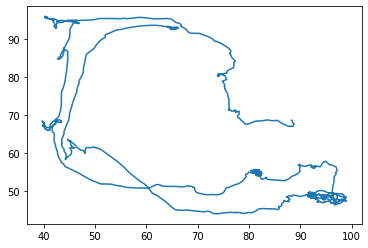

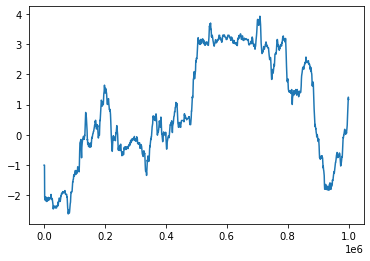

In [8]:
import matplotlib.pyplot as plt

plt.plot(d['covariates']['x'][:1000000], d['covariates']['y'][:1000000])
plt.show()

plt.plot(d['covariates']['hd'][:1000000])
plt.show()

In [9]:
d['covariates']['invalid_behaviour']

{'HD': [], 'XY': [{'index': 0, 'length': 1281}]}